## RQ5

For this task we will use a function that, given a category name in input (C0), will return the shortest path from C0 to any other category in the graph. According to our interpretation of the task, we should not consider the path from the destination category (Ci) to C0, rather we should only consider the path from nodes in C0 to Ci. Consequently, even if two nodes (n0 $\in$ C0 and ni $\in$ Ci) are not disconnected, we will still assume they are if a directional path from n0 to ni does not exist.

In our function *categories_distance* we follow these steps:
  1. we consider the exploration tree of each node in C0 thorugh the *exploration* function peviously defined.
  2. for each category Ci, we save the shortest path between any node in C0 and Ci. 
  3. we take the median for each category. 

In order to keep as much information as possible, we decided to convert "infinite" distances between two nodes with a finite number. This finite number is not fixed, but depends on the maximum distance with which, starting from n0, any connected node can be reached. In other words, we will describe the "disconnected" case as the maximum distance between n0 and any connected node + 1. In this way we are sure that we are not changing the ranking, but at the same time we will avoid to return "None" as a distance between two categories that are, in reality, not disconnected. The final result will exclude categories that are completely disconnected from C0.

In [241]:
%%time
c0 = 'Olympic_footballers_of_Spain'
d = f.categories_distance(c0, category_nodes, out_links)
print('Number of nodes in category:',len(category_nodes[c0]))
print('Percentage of categories reached: ',round((len(d)/len(category_nodes))*100,2),'%')

Number of nodes in category: 5
Percentage of categories reached:  75.23 %
CPU times: user 2min 19s, sys: 0 ns, total: 2min 19s
Wall time: 2min 19s


Here we provide an example with the category *Naturalised_citizens_of_the_United_Kingdom*. We can see that this category is connected to the 76% of the total number of categories in th graph. In the plot below we show the closest 20 categories to the input one. 

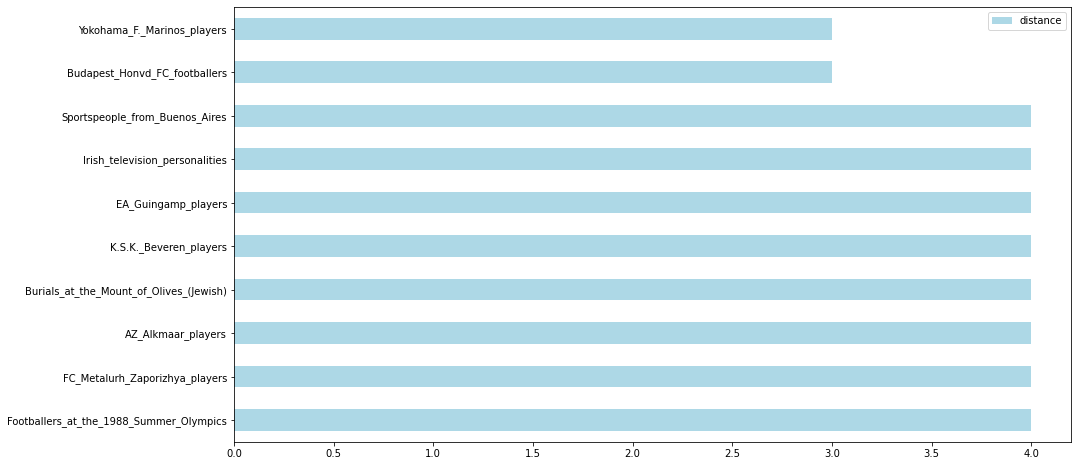

In [242]:
df_rq5 = pd.DataFrame(d, index = ['distance']).T
df_rq5.head(10).sort_values(by = 'distance', ascending = False).plot.barh(figsize = (15,8),color = 'lightblue');

Here we provide a more general overview of the distance ditribution of the categories. We can obeserve that from the category *Naturalised_citizens_of_the_United_Kingdom* we reach over half of the connected categories within 10 clicks. A peculiar aspect of this distribution is that is is not uniform, more specifically we can notice that there are three "clusters". We may address this peculiar feature to the fact that, when one node in a category (C0) has a greater distance from another node in a different category (Ci), also all the other nodes in C0 are more likely to be at a greater distance from any node in Ci.

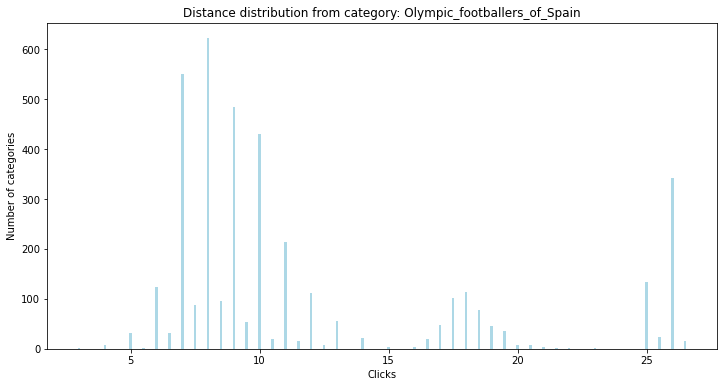

In [243]:
distances = list(d.values())
dist_plot = []
for dist in set(distances):
    dist_plot.append(distances.count(dist))
plt.figure(figsize=(12,6))
plt.bar(list(set(distances)),dist_plot,color = 'lightblue',width = 0.1);
plt.ylabel('Number of categories')
plt.xlabel('Clicks')
plt.title(f'Distance distribution from category: {c0}')
plt.show()

Since the category *Olympic_footballers_of_Spain* is connected to over 75% of the categories in the graph, we may assume that this distance distribution is actually giving a picture of how the graph is organized. In order to verify this hypothesis, we pick other two categories and check their distance distribution. \
We now consider *American_female_adult_models* and *Broadway_plays*. We can see thatn *Broadway_plays* is connected to less categories than the other two, laso it is not connected to the third cluster. However, we can observe how the distribution is really similar among the three categories which may confirm the division of our graph in at list 3 connected components and also that these three categories all belong to the most populated one.

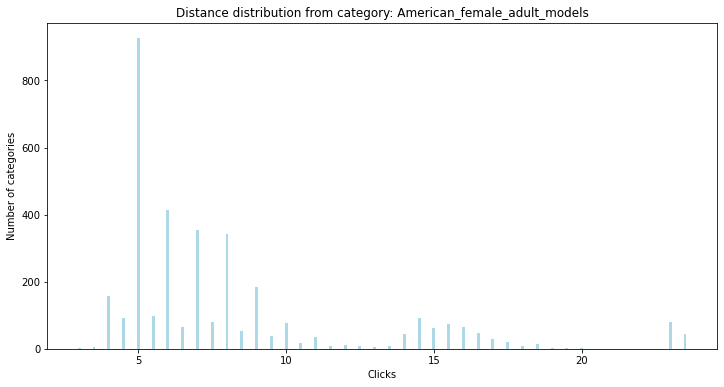

In [244]:
c0 = 'American_female_adult_models'
d = f.categories_distance(c0, category_nodes, out_links)
distances = list(d.values())
dist_plot = []
for dist in set(distances):
    dist_plot.append(distances.count(dist))
plt.figure(figsize=(12,6))
plt.bar(list(set(distances)),dist_plot,color = 'lightblue',width = 0.1);
plt.ylabel('Number of categories')
plt.xlabel('Clicks')
plt.title(f'Distance distribution from category: {c0}')
plt.show()

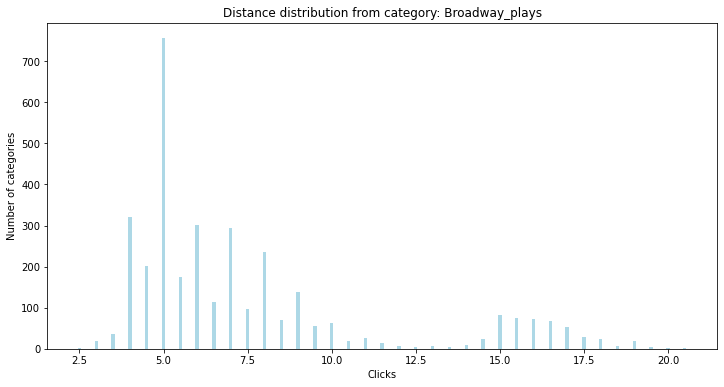

In [245]:
c0 = 'Broadway_plays'
d = f.categories_distance(c0, category_nodes, out_links)
distances = list(d.values())
dist_plot = []
for dist in set(distances):
    dist_plot.append(distances.count(dist))
plt.figure(figsize=(12,6))
plt.bar(list(set(distances)),dist_plot,color = 'lightblue',width = 0.1);
plt.ylabel('Number of categories')
plt.xlabel('Clicks')
plt.title(f'Distance distribution from category: {c0}')
plt.show()

## RQ6
To complete this task we will, at first, transform our graph into one which has the nodes' categories as nodes. In short, for each category we merge the sets of nodes associated to any of the nodes of that category. In order to keep all the information from the previous graph we decided to transform our unweighted graph to a weighted one. The weight will be the number of nodes that have in/out links from/to another category. We provide an example of the graph structure below.

In [56]:
in_links_cat = f.transform(in_links, category_nodes, nodes_category)
out_links_cat = f.transform(out_links, category_nodes, nodes_category)

We implemented the *random walk* version of the pagerank algorithm with a probabilistic approach. Since the importance of a web page can be measured by how many incoming links it has, we can see the importance of page as the probability that a random surfer on the Internet opens any page. We can interpret the weights in a probabilistic way, meaning that a greater weight increases the probability that the surfer will visit a certain page. We can model the process as a random walk on graphs. \
At the beginning, each page has equal probability to be chosen as a starting point. So, the initial probability is given by a vector which has all values $\frac{1}{n°nodes}$. The probability that page i will be visited after k steps is equal to its ranking score after k iterations. How do we determine the ranking score on a node N1 at iteration k? 
- For each node (N1) we check which nodes have an outlink to this node; 
- For each of these nodes (N2) we calculate the probability of N1 to receive a node from N2 and multiply it by the ranking score of N2 of the previous iteration, more specifically the probability that N1 recieves a link from N2 is: 
    $P_{N2} = \frac{W_{N2}}{\sum_{i=1}^{In} W_i}$
    where *In* is the number of in-links of N1 and $W_i$ is the weight of each in-link of N1.
- The score of N1 at a given iteration will be $\sum_{i=1}^{In} P_{Ni}$

CPU times: user 59.8 s, sys: 4 ms, total: 59.8 s
Wall time: 59.8 s


<AxesSubplot:>

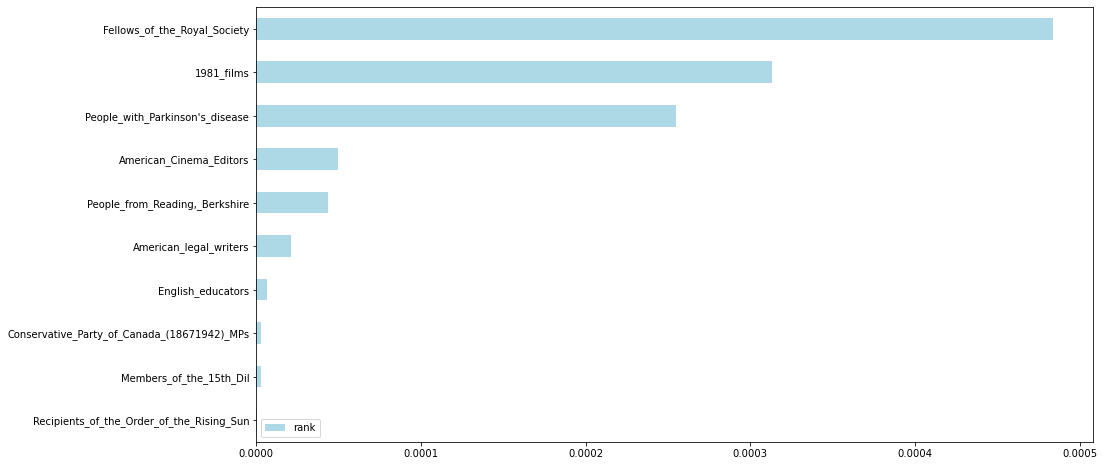

In [62]:
%%time
rank = f.pagerank(10, in_links_cat, out_links_cat)
df_rq6 = pd.DataFrame(rank, index = ['rank']).T
df_rq6.head(10).sort_values(by = 'rank', ascending = True).plot.barh(figsize = (15,8),color = 'lightblue');

CPU times: user 10min, sys: 47.8 ms, total: 10min
Wall time: 10min 1s


<AxesSubplot:>

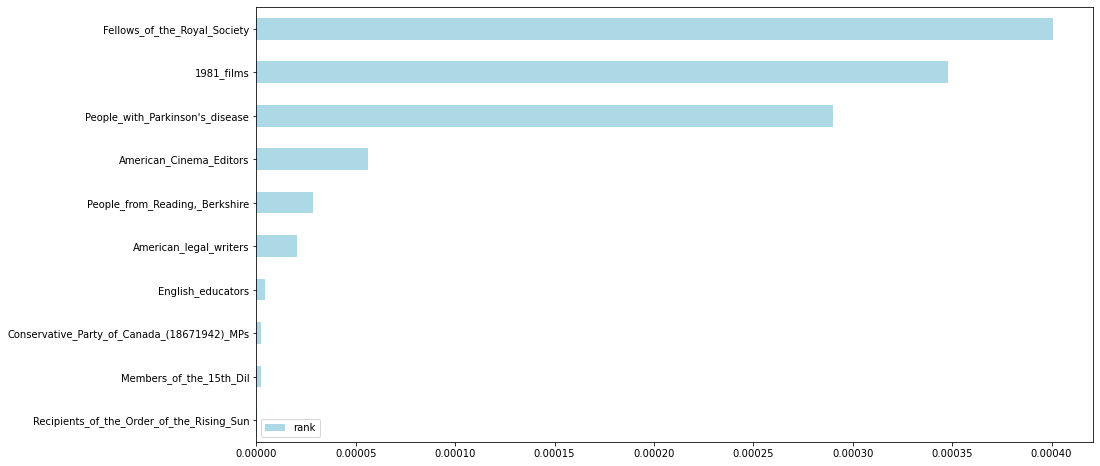

In [27]:
%%time
rank = f.pagerank(100, in_links_cat, out_links_cat)
df_rq6 = pd.DataFrame(rank, index = ['rank']).T
df_rq6.head(10).sort_values(by = 'rank', ascending = True).plot.barh(figsize = (15,8),color = 'lightblue');

We compared the ranking of the graph categories after 10 and 100 iterations. As we can see from the barplots above, the ranking that we get after 100 iteration is the same that we already had after 10 iterations, which is quite typical of sparse graphs. What changes between the two cases is the score assigned to each category, which we can assume to be a more accurate approximation after 100 iteration rather than 10. 